In [1]:
!pip install tensorflow==2.2.0

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=1518c9c87ad88a91e204794f389d84e4e11b5ff1e6578b8d04c9e068b10ae421
  Stored in directory: c:\users\86186\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2


In [5]:
# 导入工具包
import pandas as pd

sms = pd.read_csv("C:/Users/86186/Documents/机器学习/dataset/datasets/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

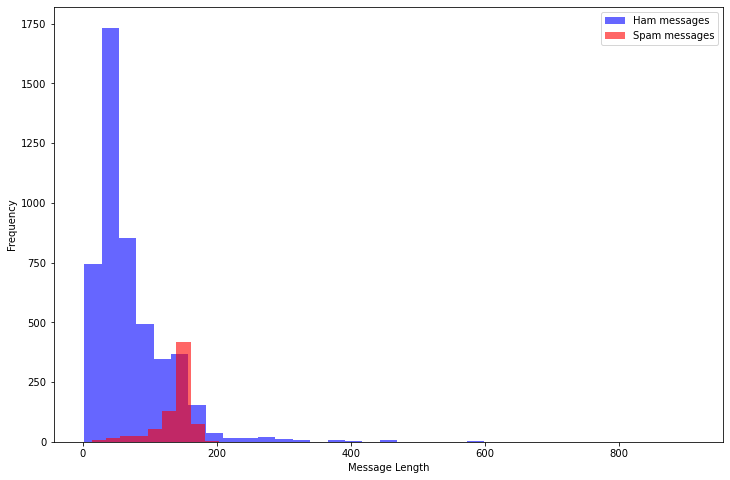

In [9]:
# 导入matplotlib工具包
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [10]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [11]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
print(len(stopword))

179


In [12]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # 检查字符是否在里面
    nopunc = [char for char in mess if char not in string.punctuation]

    # 将所有的list中的数据集进行拼接.
    nopunc = ''.join(nopunc)
    
    # 将文本中包含的停用词进行去除
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [13]:
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [14]:
stopwords.words('english')[:20] #查看停用词中前20个词语

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [15]:
# 数据集划分
from sklearn.model_selection import train_test_split
X = sms.clean_msg
y = sms.label_num
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# 实例化矢量化器
vect = CountVectorizer()

# 等效地：将拟合和变换合并为一个步骤
X_train_dtm = vect.fit_transform(X_train)

# 检查文档术语矩阵
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [17]:
# 将测试数据（使用适合的词汇表）转换为文档术语矩阵
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 9971 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_dtm = tfidf_transformer.fit_transform(X_train_dtm)
X_test_dtm = tfidf_transformer.transform(X_test_dtm)

In [19]:
X_test_dtm

<1393x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 9971 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logreg = LogisticRegression(solver='liblinear')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(min_samples_split=7)
rfc = RandomForestClassifier(n_estimators=31)

In [21]:
# 使用LR模型训练
%time logreg.fit(X_train_dtm, y_train)

Wall time: 17 ms


LogisticRegression(solver='liblinear')

In [22]:
# 使用SVM模型训练
%time svc.fit(X_train_dtm, y_train)

Wall time: 395 ms


SVC(gamma=1.0, kernel='sigmoid')

In [23]:
# 使用决策树模型训练
%time dtc.fit(X_train_dtm, y_train)

Wall time: 149 ms


DecisionTreeClassifier(min_samples_split=7)

In [24]:
# 使用随机森林模型训练
%time rfc.fit(X_train_dtm, y_train)

Wall time: 201 ms


RandomForestClassifier(n_estimators=31)

In [25]:
# 对X_test_dtm进行类预测
y_pred_class = logreg.predict(X_test_dtm)

In [26]:
y_pred_prob = logreg.predict_proba(X_test_dtm)
# 输出前10条样本输出概率
y_pred_prob[0:10]

array([[0.92536683, 0.07463317],
       [0.9464307 , 0.0535693 ],
       [0.84810082, 0.15189918],
       [0.94719643, 0.05280357],
       [0.63747262, 0.36252738],
       [0.99046287, 0.00953713],
       [0.92448776, 0.07551224],
       [0.95438078, 0.04561922],
       [0.9618929 , 0.0381071 ],
       [0.97146221, 0.02853779]])

In [27]:
# 使用SVM模型预测
svc_y_pred_class = svc.predict(X_test_dtm)
# 使用决策树预测
dtc_y_pred_class = dtc.predict(X_test_dtm)
# 使用SVM模型预测
rfc_y_pred_class = rfc.predict(X_test_dtm)

In [28]:
from sklearn import metrics
# 逻辑回归准确率
logreg_acc = metrics.accuracy_score(y_test, y_pred_class)
logreg_acc

0.9633883704235463

In [29]:
# SVM模型准确率
svm_acc = metrics.roc_auc_score(y_test, svc_y_pred_class)
svm_acc

0.9432078409819546

In [30]:
# 决策树模型准确率
dtc_acc = metrics.roc_auc_score(y_test, dtc_y_pred_class)
dtc_acc

0.8862004213611798

In [31]:
# 随机森林模型准确率
rfc_acc = metrics.roc_auc_score(y_test, rfc_y_pred_class)
rfc_acc

0.9213978199138958

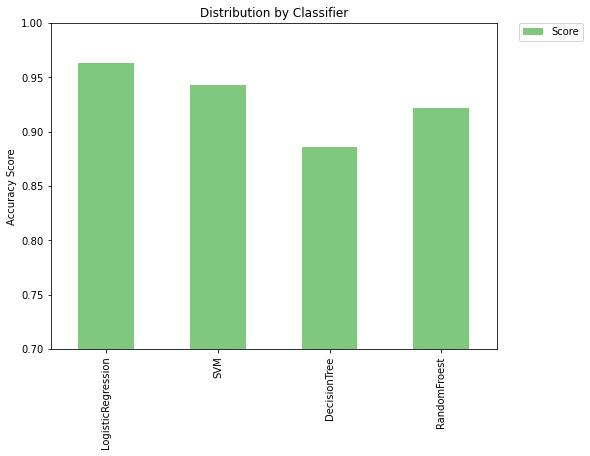

In [32]:
import numpy as np
# 将不同算法的结果准确率可视化
pred_scores = [('LogisticRegression', [logreg_acc]), 
               ('SVM', [svm_acc]), 
               ('DecisionTree', [dtc_acc]), 
               ('RandomFroest', [rfc_acc])]
df = pd.DataFrame.from_dict(dict(pred_scores),orient='index', columns=['Score'])

df.plot(kind='bar', ylim=(0.7,1.0), figsize=(8,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
test_case = X_test[40:50]
X_test[40:50]

574                                Nope waiting sch daddy
1272                                                   Ok
255        necessarily expect done get back though headin
4992                                             HEY KATE
2582    3 FREE TAROT TEXTS Find love life TRY 3 FREE T...
5144                                       office dawhere
1973                           askd question hours answer
3242             Pls accept one day begging change number
359     Hello got st andrewsboy long way cold keep posted
1791    havenåÕt lost ill always b 4ui didnåÕt intend ...
Name: clean_msg, dtype: object

In [34]:
case_test_dtm = tfidf_transformer.transform(vect.transform(test_case))
# 使用逻辑回归模型进行预测
y_pred_class = logreg.predict(case_test_dtm)
y_pred_class

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)